# About Dataset
This dataset captures demographic and behavioral information about individuals concerning their purchasing decisions. It consists of 400 samples, with each entry containing the following major columns:

- Gender: The gender of the individual, categorized as either "Male" or "Female."
- Age: The age of the individual, represented as an integer.
- EstimatedSalary: The estimated annual salary of the individual, expressed in monetary units.
- Purchased: A binary indicator (0 or 1) representing whether the individual made a purchase (1) or not (0).

The dataset can be utilized for predictive modeling to understand the factors influencing purchasing behavior, particularly focusing on how gender, age, and salary might correlate with purchasing decisions. This analysis could be beneficial for marketers looking to tailor their strategies to specific demographics based on these attributes.

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score, classification_report
import seaborn as sb

In [294]:
warnings.filterwarnings('ignore')

In [296]:
df = pd.read_csv("Assets/Social_Network_Ads.csv")

In [298]:
df.head() #No need of User ID column

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [300]:
df.isnull().sum() #check if any value is null

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [302]:
df['Gender']

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [304]:
le = LabelEncoder()
Gender = le.fit_transform(df['Gender'])

In [306]:
Gender

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [308]:
Gender = pd.DataFrame(data = Gender, columns = ['la_Gender'])

In [310]:
Gender

,la_Gender
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [312]:
df = pd.concat([df, Gender], axis=1)


In [314]:
df.drop(columns=['Gender'])

,User ID,Age,EstimatedSalary,Purchased,la_Gender
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [316]:
columns = df[["Age","EstimatedSalary","la_Gender"]]

In [318]:
X = columns

In [320]:
X.shape

(400, 3)

In [373]:
X

,Age,EstimatedSalary,la_Gender
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [324]:
y = df.iloc[:,-2]

In [326]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [328]:
y.shape

(400,)

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=10)

In [479]:
#let's Scale the data in traning
s_c = StandardScaler()
X_train = s_c.fit_transform(X_train)
X_test = s_c.fit_transform(X_test)

In [418]:
X_train.shape

(300, 3)

In [422]:
X_test.shape

(100, 3)

In [426]:
y_train.shape

(300,)

In [428]:
y_test.shape

(100,)

In [481]:
knn = KNeighborsClassifier()

In [483]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [485]:
pred = knn.predict(X_test)

In [487]:
accuracy_score(y_test,pred)

0.92

In [ ]:
#Get misclassified samples index through numpy

In [495]:
np.where(pred!=y_test)

(array([ 2,  3,  7, 11, 65, 78, 80, 93], dtype=int64),)

In [520]:
pred[2]

0

In [518]:
y_test.iloc[2]

1

In [489]:
#Using confusion metrics we can know in testing data how many were wrong & correct in prediction data
c_m = confusion_matrix(y_test,pred)
c_m

array([[63,  6],
       [ 2, 29]], dtype=int64)

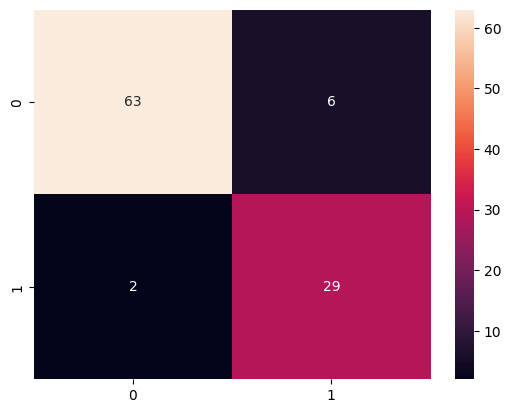

In [491]:
#How to plot Confusion Matrix:

sb.heatmap(c_m, annot = True)
plt.show()

## Precision & Recall:-

In [526]:
p_s = precision_score(y_test,pred,average = None) #Average = None is used to see the score for 0 and 1 class
p_s

array([0.96923077, 0.82857143])

In [528]:
recall_score(y_test,pred, average = None)

array([0.91304348, 0.93548387])

In [530]:
f1_score(y_test, pred, average = None)

array([0.94029851, 0.87878788])

# Classification Report

In [547]:
print(classification_report(y_test,pred)) #THIS WILL CALCULATE ALL THING IN A SINGLE LINE

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        69
           1       0.83      0.94      0.88        31

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.93      0.92      0.92       100



In [ ]:
#Let's train the whole data now

In [332]:
knn.fit(X,y) #Firstly will pass the whole data to the model

KNeighborsClassifier()

In [410]:
#Model trained on whole data and let's predit unseen data

In [334]:
df = pd.read_csv("Assets/predict_Social_Network_Ads.csv")

In [336]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,34,15000,0
1,Male,23,30000,0
2,Female,21,200000,1
3,Male,22,10000,0
4,Female,75,20000,0
5,Female,16,150000,1
6,Male,23,31000,0


In [338]:
le_Gender = le.fit_transform(df['Gender'])

In [340]:
la_Gender = pd.DataFrame(le_Gender, columns = ['la_Gender'])

In [342]:
la_Gender

,la_Gender
0,1
1,1
2,0
3,1
4,0
5,0
6,1


In [344]:
df = pd.concat([df, la_Gender], axis=1)


In [346]:
df

,Gender,Age,EstimatedSalary,Purchased,la_Gender
0,Male,34,15000,0,1
1,Male,23,30000,0,1
2,Female,21,200000,1,0
3,Male,22,10000,0,1
4,Female,75,20000,0,0
5,Female,16,150000,1,0
6,Male,23,31000,0,1


In [348]:
df.drop(columns=["Gender"])

,Age,EstimatedSalary,Purchased,la_Gender
0,34,15000,0,1
1,23,30000,0,1
2,21,200000,1,0
3,22,10000,0,1
4,75,20000,0,0
5,16,150000,1,0
6,23,31000,0,1


In [350]:
X_test = df[["Age","EstimatedSalary","la_Gender"]]

In [352]:
X_test.shape

(7, 3)

In [354]:
pred = knn.predict(X_test)

In [356]:
pred

array([0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [358]:
pred = pred.flatten()

In [360]:
pred

array([0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [362]:
input_file = 'Assets/predict_Social_Network_Ads.csv'

In [364]:
#Input file
df_input = pd.read_csv(input_file)
df_input

,Gender,Age,EstimatedSalary,Purchased
0,Male,34,15000,0
1,Male,23,30000,0
2,Female,21,200000,1
3,Male,22,10000,0
4,Female,75,20000,0
5,Female,16,150000,1
6,Male,23,31000,0


In [366]:
df_input['Purchased'] = pred
df_input

,Gender,Age,EstimatedSalary,Purchased
0,Male,34,15000,0
1,Male,23,30000,0
2,Female,21,200000,1
3,Male,22,10000,0
4,Female,75,20000,0
5,Female,16,150000,1
6,Male,23,31000,0


In [368]:
df_input.to_csv(input_file,index = False)

In [398]:
y.shape

(400,)